CLUSTERING PARTIZIONALE FUZZY K-MEANS

nel clustering fuzzy c-means, ogni punto dati può appartenere a più cluster con diversi gradi di appartenenza. Il grado di appartenenza è un numero reale tra 0 e 1. Il grado di appartenenza 0 indica che il punto dati non appartiene al cluster, mentre il grado di appartenenza 1 indica che il punto dati appartiene completamente al cluster. Il grado di appartenenza 0 <grado di appartenenza <1 indica che il punto dati appartiene parzialmente al cluster.

Il clustering fuzzy c-means è un algoritmo di clustering iterativo. L'algoritmo fuzzy c-means è simile all'algoritmo k-means. L'algoritmo fuzzy c-means è anche noto come FCM. L'algoritmo fuzzy c-means è un algoritmo di clustering iterativo. L'algoritmo fuzzy c-means è simile all'algoritmo k-means. L'algoritmo fuzzy c-means è anche noto come FCM.



In [ ]:
# realizziamo il clustering partizionale con il metodo fuzzy c-means
# importiamo le librerie
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

# https://pypi.org/project/fuzzy-c-means/
from fcmeans import FCM

In [ ]:
# importiamo il dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # prendiamo solo le prime due features
y = iris.target

In [ ]:
# creiamo il modello
fcm = FCM(n_clusters=3)
fcm.fit(X)

# prediciamo i cluster
fcm_labels = fcm.predict(X)

# visualizziamo i cluster
f, axes = plt.subplots(1, 2, figsize=(11,5))
scatter = axes[0].scatter(X[:,0], X[:,1], c=y)
scatter = axes[1].scatter(X[:,0], X[:,1], c=fcm_labels)
plt.show()


In [ ]:
# valutiamo per quale valore di k abbiamo abbiamo il miglior clustering
for k in range(2, 10):
    fcm = FCM(n_clusters=k)
    fcm.fit(X)
    fcm_labels = fcm.predict(X)
    f, axes = plt.subplots(1, 2, figsize=(11,5))
    scatter = axes[0].scatter(X[:,0], X[:,1], c=y)
    scatter = axes[1].scatter(X[:,0], X[:,1], c=fcm_labels)
    plt.title("k = " + str(k))
    plt.show()


Silhouette:  2
Calinski-Harabasz:  5
Davies-Bouldin:  3


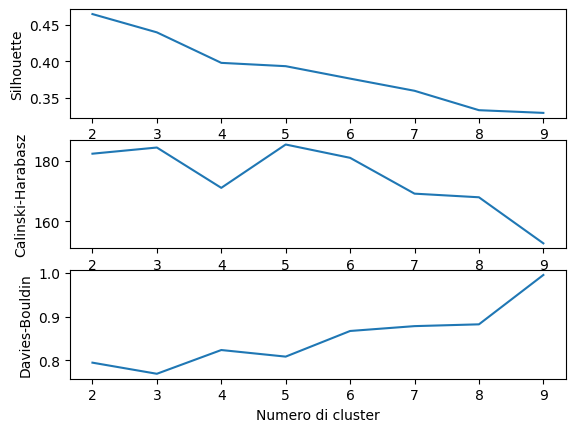

In [9]:
# confrontiamo con una funzione di utilità per il clustering partizionale
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

def evaluate_fuzzy(X, k):

    fcm = FCM(n_clusters=k)
    fcm.fit(X)
    y_kmeans = fcm.predict(X)

    silhouette = silhouette_score(X, y_kmeans)
    calinski = calinski_harabasz_score(X, y_kmeans)
    davies = davies_bouldin_score(X, y_kmeans)

    return silhouette, calinski, davies

# visualizziamo i risultati
silhouette = []
calinski = []
davies = []
min_k = 2
max_k = 10
for k in range(min_k, max_k):
    s, c, d = evaluate_fuzzy(X, k)
    silhouette.append(s)
    calinski.append(c)
    davies.append(d)

# visualizziamo il miglior valore per ogni indice
print('Silhouette: ', silhouette.index((max(silhouette)))+min_k)
print('Calinski-Harabasz: ', calinski.index((max(calinski)))+min_k)
print('Davies-Bouldin: ', davies.index((min(davies)))+min_k)

# plottiamo con assi separati
plt.subplot(3, 1, 1)
plt.plot(range(2, 10), silhouette)
plt.xlabel('Numero di cluster')
plt.ylabel('Silhouette')

plt.subplot(3, 1, 2)
plt.plot(range(2, 10), calinski)
plt.xlabel('Numero di cluster')
plt.ylabel('Calinski-Harabasz')

plt.subplot(3, 1, 3)
plt.plot(range(2, 10), davies)
plt.xlabel('Numero di cluster')
plt.ylabel('Davies-Bouldin')

plt.show()